In [1]:
from networks import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress
import powerlaw


In [2]:

# Trader Network parameters
num_traders = 1600         # Number of traders in the network
avg_degree = 4               # Average degree of the network
rewiring_probability = 0.2  # Probability of rewiring a link
percent_fund = 0.25       # Percent of fundametalists
percent_chart = 0.75         # Percent of Chartist

# Fundamentalist
phi = 1                    # Price sensitivity parameters
pf = 5000                    # Fundamentalist's fundamental price
# Information distribution
max_info = 0.01             # Maximum information that is distributed at each time step
alpha = 0.9                  # Fraction of information that will be distributed when active
global_prices = [5000]       # Global price list with initial price

# Noise terms
sigma = 100                  # Amplitude of noise
beta = 7                     # Exponent global price noise

avalanches = []              # List of avalanche sizes at each time step

info_list = [[],[]]

num_days = 250




In [3]:
network, trader_dictionary = create_trader_network(num_traders, avg_degree, rewiring_probability,percent_fund,percent_chart, phi)

In [4]:
#display_network(network, trader_dictionary)

## Price time series

### When S0 = Pf

In [5]:
avalanche_counter_current_time, avalanche_price_delta_list, global_prices, info_list, sum_avalanch_per_day =run_simulation(trader_dictionary, network,max_info,global_prices,alpha,sigma, beta, pf, info_list,avalanches, num_days)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1561.964


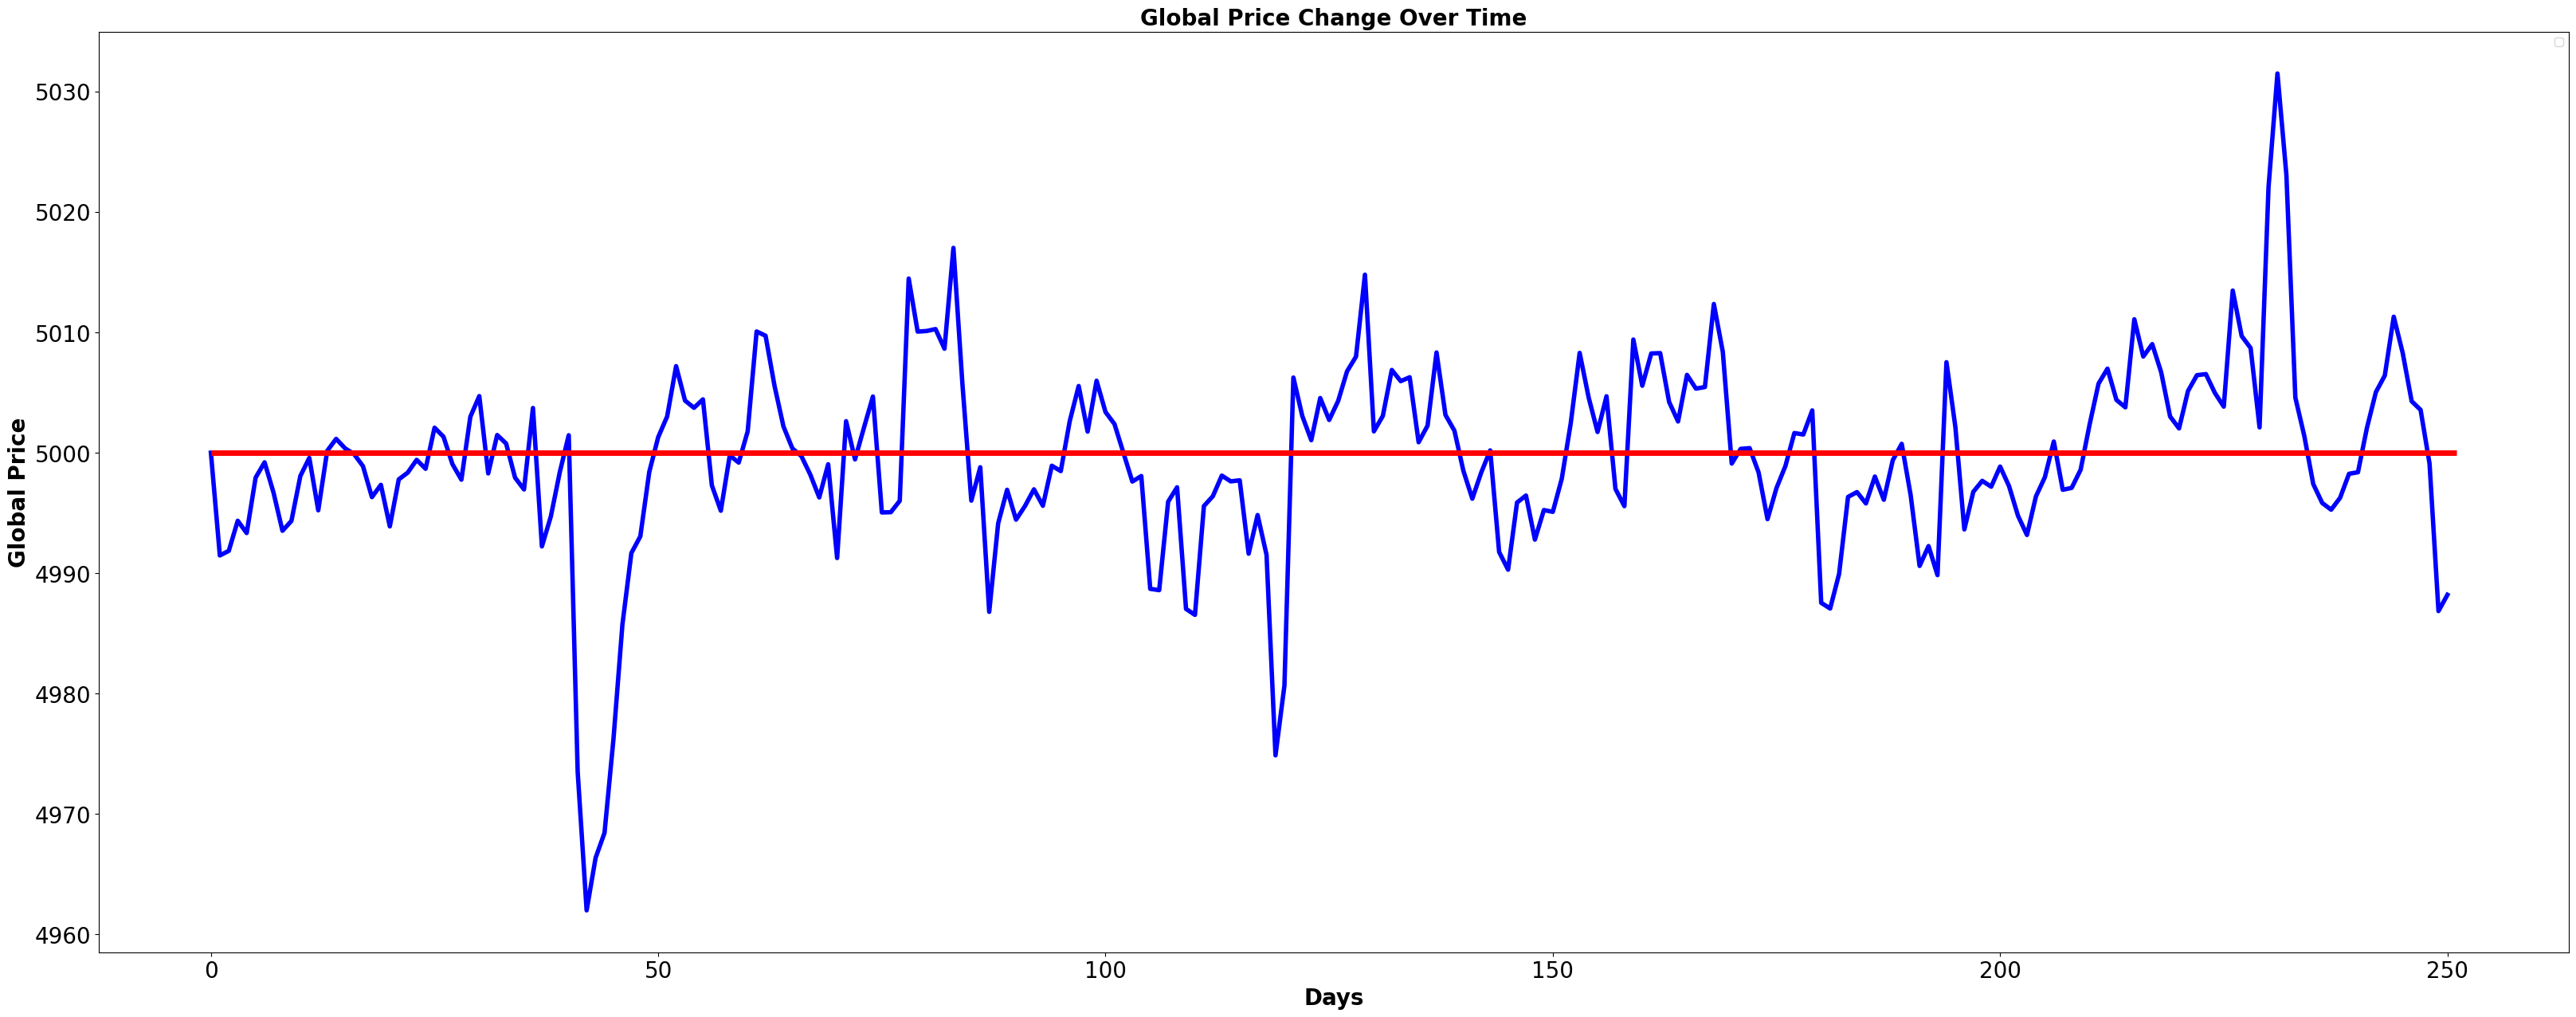

In [8]:

# Plotting
plt.figure(figsize=(40, 15))

# Highlighting the days with the top 10 avalanches
#for day in set(top_10_days):  # Using set to avoid duplicate days
    #plt.axvline(x=day+1, color='red', label='Top 10 Avalanches' if day == top_10_days[0] else "")
plt.xlabel("Days", fontsize=20,  fontweight='bold')
plt.ylabel("Global Price", fontsize=20,  fontweight='bold')
plt.title("Global Price Change Over Time", fontsize=20,  fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.plot(global_prices, linewidth=4, color = "blue")
plt.hlines(pf, xmin= 0, xmax= len(global_prices), linewidth=5, color = "red")
#plt.plot([0 for price in global_prices], linewidth=5,color = "blue")

# Adding a label at each point
#for i, value in enumerate(global_prices[:-1]):
    #if(sum_avalanch_per_day[i] > (np.average(sum_avalanch_per_day))*2):
        #plt.text(i, value, str(sum_avalanch_per_day[i]), fontsize=20, ha='right', va='bottom')

print(np.average(sum_avalanch_per_day))


# Plot line segments for big swings
#for t in range(1, len(global_prices[:-1])):
    #if price_change_list[t] > np.average(price_change_list):
        #plt.plot([t-1, t], [global_prices[t-1], global_prices[t]], color='black', lw=2)

        #plt.scatter([t-1, t], [global_prices[t-1], global_prices[t]], color='black', s=60)  # s is the size of the dot

plt.legend()
plt.show()



# Showing the plot
plt.show()


## Normalised returns 

### Distribution

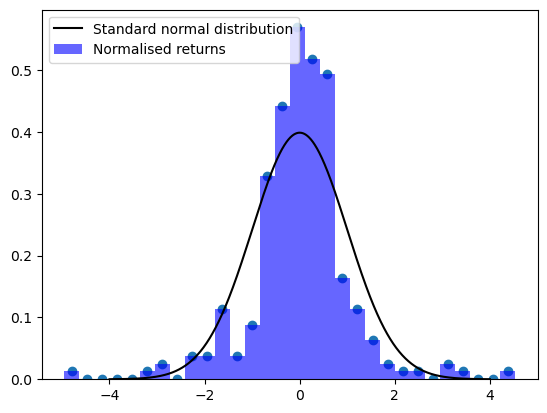

In [26]:
from scipy.stats import norm
import scipy.stats as stats
from scipy.optimize import curve_fit


#Returns
returns_price = [np.log(global_prices[i+1])-np.log(global_prices[i]) for i in range(len(global_prices)-1)] 

# Normalize Returns
mean_returns = np.mean(returns_price) 
stand_returns = np.std(returns_price)
normalized_returns = [(r - mean_returns) / stand_returns for r in returns_price]

#PDF
counts, edges = np.histogram(normalized_returns, bins=30, density=True)
bin_centers = (edges[:-1] + edges[1:]) / 2
plt.scatter(bin_centers, counts)

# Standard Gaussian fitting curve
mu = 0
sigma = 1
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
Gaussian = norm.pdf(x, mu, sigma)
plt.plot(x, Gaussian, label='Standard normal distribution', color = "black")

# Fit a normal distribution to the data
#mu, std = norm.fit(normalized_returns)

#Histogram for normalised returns
plt.hist(normalized_returns, bins=30, density=True, alpha=0.6, color='blue', label="Normalised returns")

plt.legend()

# Plot the PDF of the fitted normal distribution
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'k', linewidth=2)



# q-Gaussian fitting curve
# def q_gaussian(x, q, beta, A):
#     if q == 1:
#         return A * np.exp(-beta * x**2)
#     else:
#         return A * np.maximum((1 - (1 - q) * beta * x*2), 1e-5)*(1 / (1 - q))
# #         return A * (1 - (1 - q) * beta * x*2)*(1 / (1 - q))
# initial_guess = [0.5, 0.5, 0.5]
# params, cov = curve_fit(q_gaussian, bin_centers, counts, p0=initial_guess)
# q_fit, beta_fit, A_fit = params
# x_values = np.linspace(min(normalized_returns), max(normalized_returns), 1000)
# y_values = q_gaussian(x_values, q_fit, beta_fit, A_fit)
# plt.plot(x_values, y_values, label=f'q-Gaussian(q={q_fit:.2f})', color='black')

# plt.xlabel('Normalized Returns')
# plt.ylabel('PDF')
# plt.legend()
# plt.show()


### QQ Plot

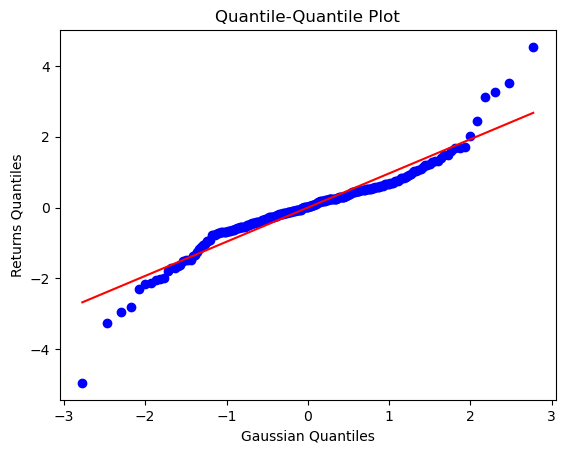

In [10]:

# Quantile-Quantile Plot
stats.probplot(normalized_returns, dist="norm", plot=plt)
plt.title('Quantile-Quantile Plot')
plt.xlabel('Gaussian Quantiles')
plt.ylabel('Returns Quantiles')
plt.show()


### Power Law

In [7]:
import numpy as np
import matplotlib.pyplot as plt



def calculate_price_changes(price_series, step=1):
    price_changes = []
    for i in range(0, len(price_series) - step, step):
        change = np.abs(5000 - price_series[i])
        price_changes.append(change)
    return price_changes

def calculate_upward_trends(price_series):
    increases = []
    current_increase = 0

    for i in range(1, len(price_series)):
        if price_series[i] > price_series[i-1]:
            current_increase += price_series[i] - price_series[i-1]
        elif current_increase > 0:
            increases.append(current_increase)
            current_increase = 0

    # Add the last increase if the series ends on an upward trend
    if current_increase > 0:
        increases.append(current_increase)

    return increases

# Example usage

price_changes = calculate_price_changes(global_prices)
# Assuming global_prices is your price data

# Define bins of 0.01%
bin_edges = np.arange(0, max(price_changes) + 0.8,0.8)  # 0.01% increments

# Create histogram
hist, bins = np.histogram(price_changes, bins=bin_edges)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Filter out zero counts for log-log plot
non_zero_hist = hist[hist > 0]
non_zero_bin_centers = bin_centers[hist > 0]

def model_func(x, a, b):
    return a * x + b

# Perform linear regression using curve_fit with weights
popt, pcov = curve_fit(model_func, log_values, log_counts, sigma=errorbars, absolute_sigma=True)
fitted_line = model_func(log_values, *popt)

# Plotting
plt.scatter(non_zero_bin_centers, non_zero_hist, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Absolute Price Change (%)')
plt.ylabel('Frequency')
plt.title('Log-Log Plot of Absolute Price Change')

NameError: name 'curve_fit' is not defined

## Price change vs avalanch sizes

In [ ]:
sum_avalanch_per_day = []

for day in avalanches:

    sum = np.sum(day)
    sum_avalanch_per_day.append(sum)


In [ ]:
for i in range(0,100):
    random_number_m = np.random.normal(45, 15)
    m = int(round(random_number_m))
    print(m) #Convert number from normal distribution to integer

49
53
52
50
40
57
41
45
42
56
61
27
24
45
12
55
59
24
26
22
63
50
44
51
35
40
35
35
44
21
59
11
65
76
22
46
37
47
40
30
39
58
35
40
72
33
26
72
39
25
54
63
80
67
38
38
46
34
38
36
46
27
29
46
45
49
41
66
61
39
56
25
38
32
59
47
59
35
26
57
48
51
47
41
19
25
52
61
44
45
31
39
61
42
54
48
69
30
73
30


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.0, 1.0, 2.0, 22.0, 4.0, 8.0, 4.0, 0.0, 16.0, 8.0, 11.0, 5.0, 25.0, 4.0, 2.0, 24.0, 5.0, 5.0, 13.0, 10.0, 13.0, 3.0, 15.0, 6.0, 17.0, 17.0, 13.0, 5.0, 2.0, 14.0, 15.0, 41.0, 16.0, 4.0, 6.0, 30.0, 18.0, 9.0, 47.0, 38.0, 161.0, 2.0, 11.0, 12.0, 688.0, 109.0, 96.0, 11.0, 823.0, 67.0, 39.0, 2.0, 16.0, 49.0, 19.0, 7.0, 46.0, 3.0, 4.0, 46.0, 12.0, 11.0, 32.0, 56.0, 31.0, 28.0, 17.0, 38.0, 43.0, 28.0, 39.0, 41.0, 3.0, 25.0, 21.0, 9.0, 29.0, 7.0, 42.0, 1.0, 82.0, 70.0, 44.0, 192.0, 250.0, 51.0, 44.0, 22.0, 37.0, 60.0, 21.0, 197.0, 82.0, 44.0, 111.0, 70.0, 54.0, 491.0, 58.0, 8.0, 21.0, 36.0, 33.0, 37.0, 10.0, 1.0, 79.0, 4.0, 61.0, 8.0, 12.0, 77.0, 53.0, 46.0, 58.0, 55.0, 27.0, 48.0, 242.0, 67.0, 207.0, 79.0, 144.0, 30.0, 133.0, 11.0, 134.0, 92.0, 190.0, 209.0, 25.0, 6.0, 14.0, 45.0, 491.0, 26.0, 50.0, 7.0, 83.0, 39.0, 48.0, 16.0, 289.0, 23

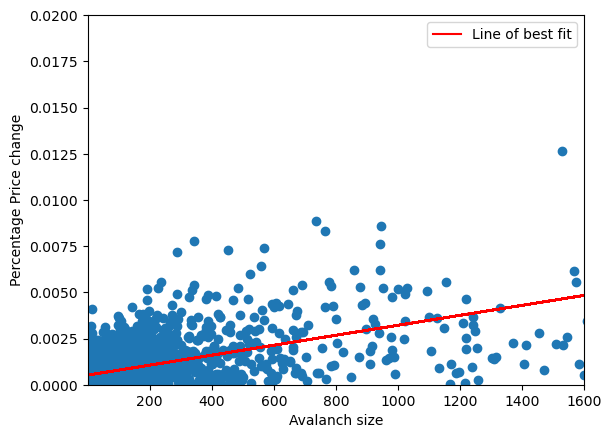

In [ ]:
#print(sum_avalanch_per_day)
#print(price_change_list)

zipped = list(zip(sum_avalanch_per_day, price_change_list))

#print(global_prices)
#print("MAX AVALANCH -->", np.max(sum_avalanch_per_day))
#print("MAX PRICE CHANGE-->",np.max(price_change_list))


# Assuming sum_avalanch_per_day and price_change_list are your existing data lists
sum_avalanch_per_day = np.array(sum_avalanch_per_day)
price_change_list = np.array(price_change_list)

sum_avalanch_per_day_truncated = []
price_change_list_truncated = []

for i in range(len(sum_avalanch_per_day)):

    if(sum_avalanch_per_day[i] < 1600):
        sum_avalanch_per_day_truncated.append(sum_avalanch_per_day[i])
        price_change_list_truncated.append(price_change_list[i])

print(sum_avalanch_per_day_truncated)


# Perform linear regression
slope, intercept, _, _, _ = linregress(sum_avalanch_per_day_truncated, price_change_list_truncated)

# Function to calculate y-values for the line of best fit
def line_of_best_fit(x):
    return slope * x + intercept

# Generate y-values for the line of best fit
line_y = line_of_best_fit(sum_avalanch_per_day)

# Plotting the scatter plot
plt.scatter(sum_avalanch_per_day, price_change_list)
plt.xlabel("Avalanch size")
plt.ylabel("Percentage Price change")

# Plotting the line of best fit
plt.plot(sum_avalanch_per_day, line_y, color='red', label='Line of best fit')

# Show legend
plt.legend()
plt.xlim(0.8,1600)
plt.ylim(0,0.02)
# Show the plot
plt.show()



#print(np.where(sum_avalanch_per_day = np.max(sum_avalanch_per_day)))

## Price action vs information vs avalanch sizes

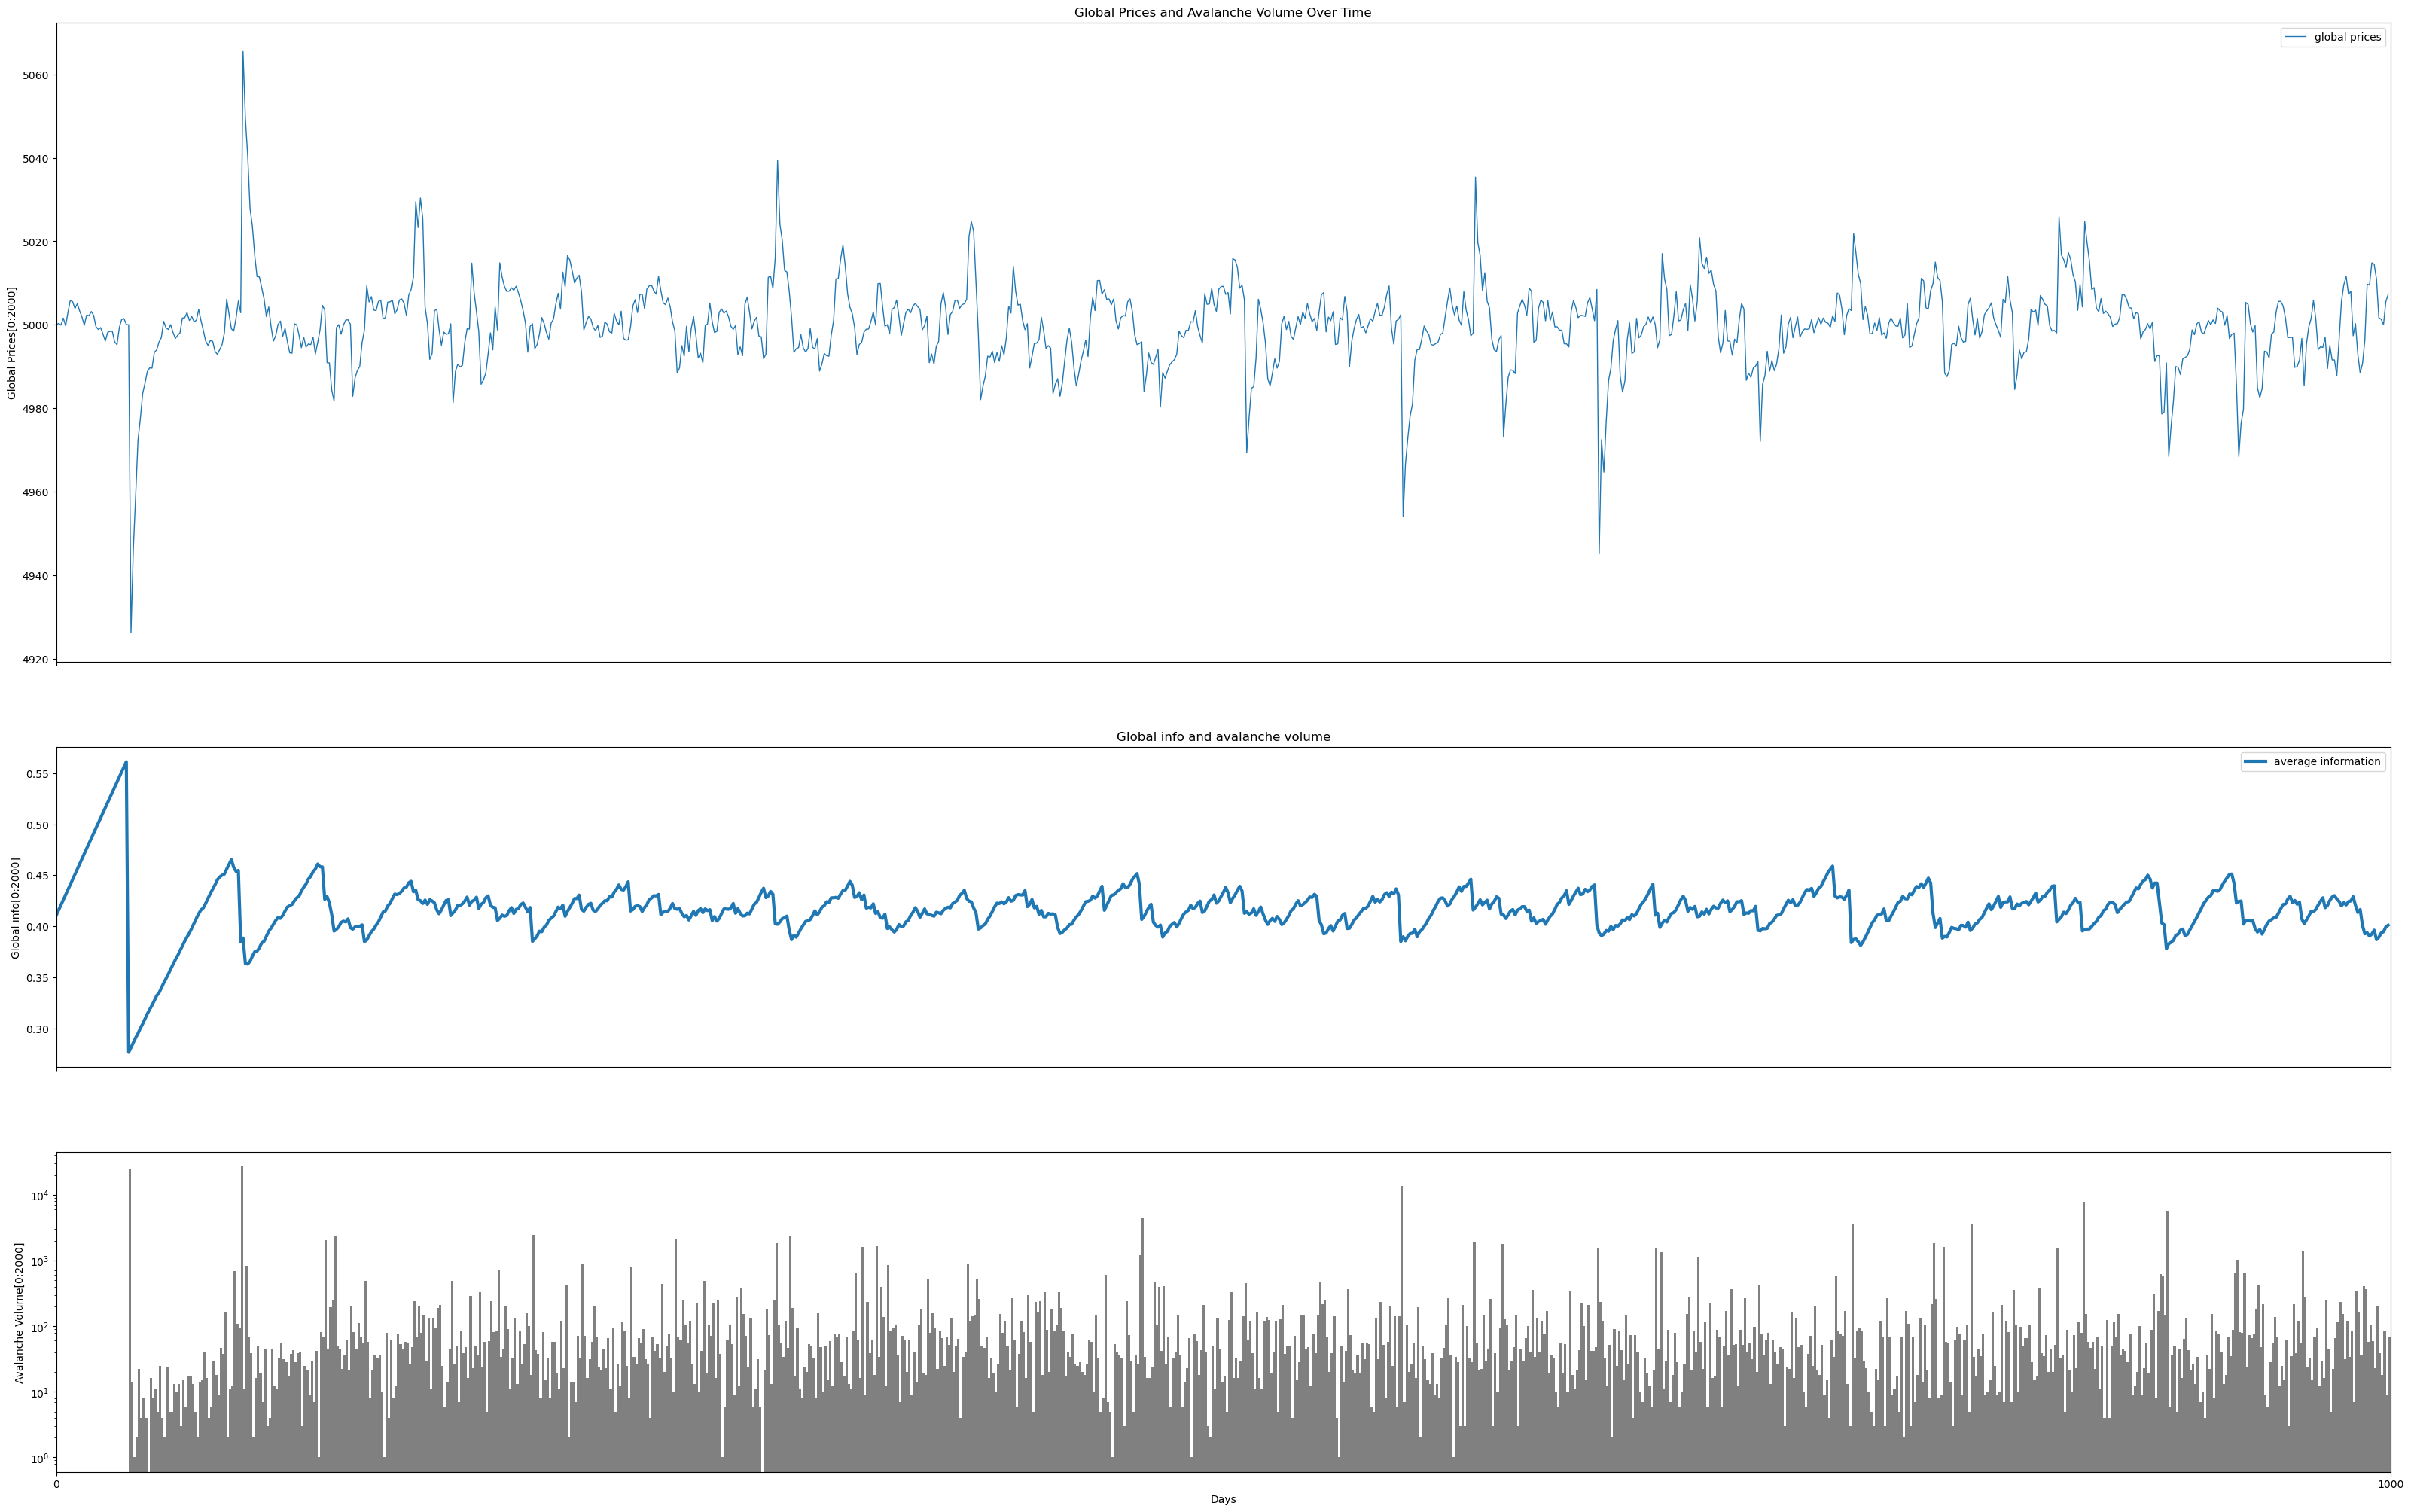

In [ ]:
# Plotting
# plt.figure(figsize=(70, 10))
# plt.xlim(0, len(global_prices))

xmax = 1000


# Create subplots with shared x-axis
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(40, 25), sharex=True, gridspec_kw={'height_ratios': [2,1, 1]})
ax1.plot(global_prices[0:xmax], linewidth=1, label='global prices')
ax1.set_xlim([0, xmax]) 
# ax1.axhline(y=5000, color='red', label='Fundamental price')
ax1.set_ylabel('Global Prices[0:2000]')
ax1.set_title('Global Prices and Avalanche Volume Over Time')
ax1.legend()
# Line plot for global prices on the first subplot
info_list_sliced = info_list[0]
ax2.plot(info_list_sliced[0:xmax], linewidth=3, label='average information')
ax2.set_ylabel('Global info[0:2000]')
ax2.set_title('Global info and avalanche volume')
ax2.legend()
# Histogram (volume) for avalanche volume on the second subplot
avalanches_summed = [np.sum(day) for day in avalanches]
avalanches_summed_sliced = avalanches_summed[0:xmax]
bin_edges = np.arange(0, len(avalanches_summed_sliced) + 1, 1)
ax3.hist(range(len(avalanches_summed_sliced)), bins=bin_edges, weights=avalanches_summed_sliced, color='gray')
ax3.set_ylabel('Avalanche Volume[0:2000]')
ax3.set_xlabel('Days')
ax3.set_yscale('log')  # Set y-axis to logarithmic scale
# _ = ax1.set_xticks(np.arange(0.5, len(global_prices)+0.5, 2))  # Set x-axis ticks every 10 days
_ = ax1.set_xticks(np.arange(0, xmax+1, xmax))



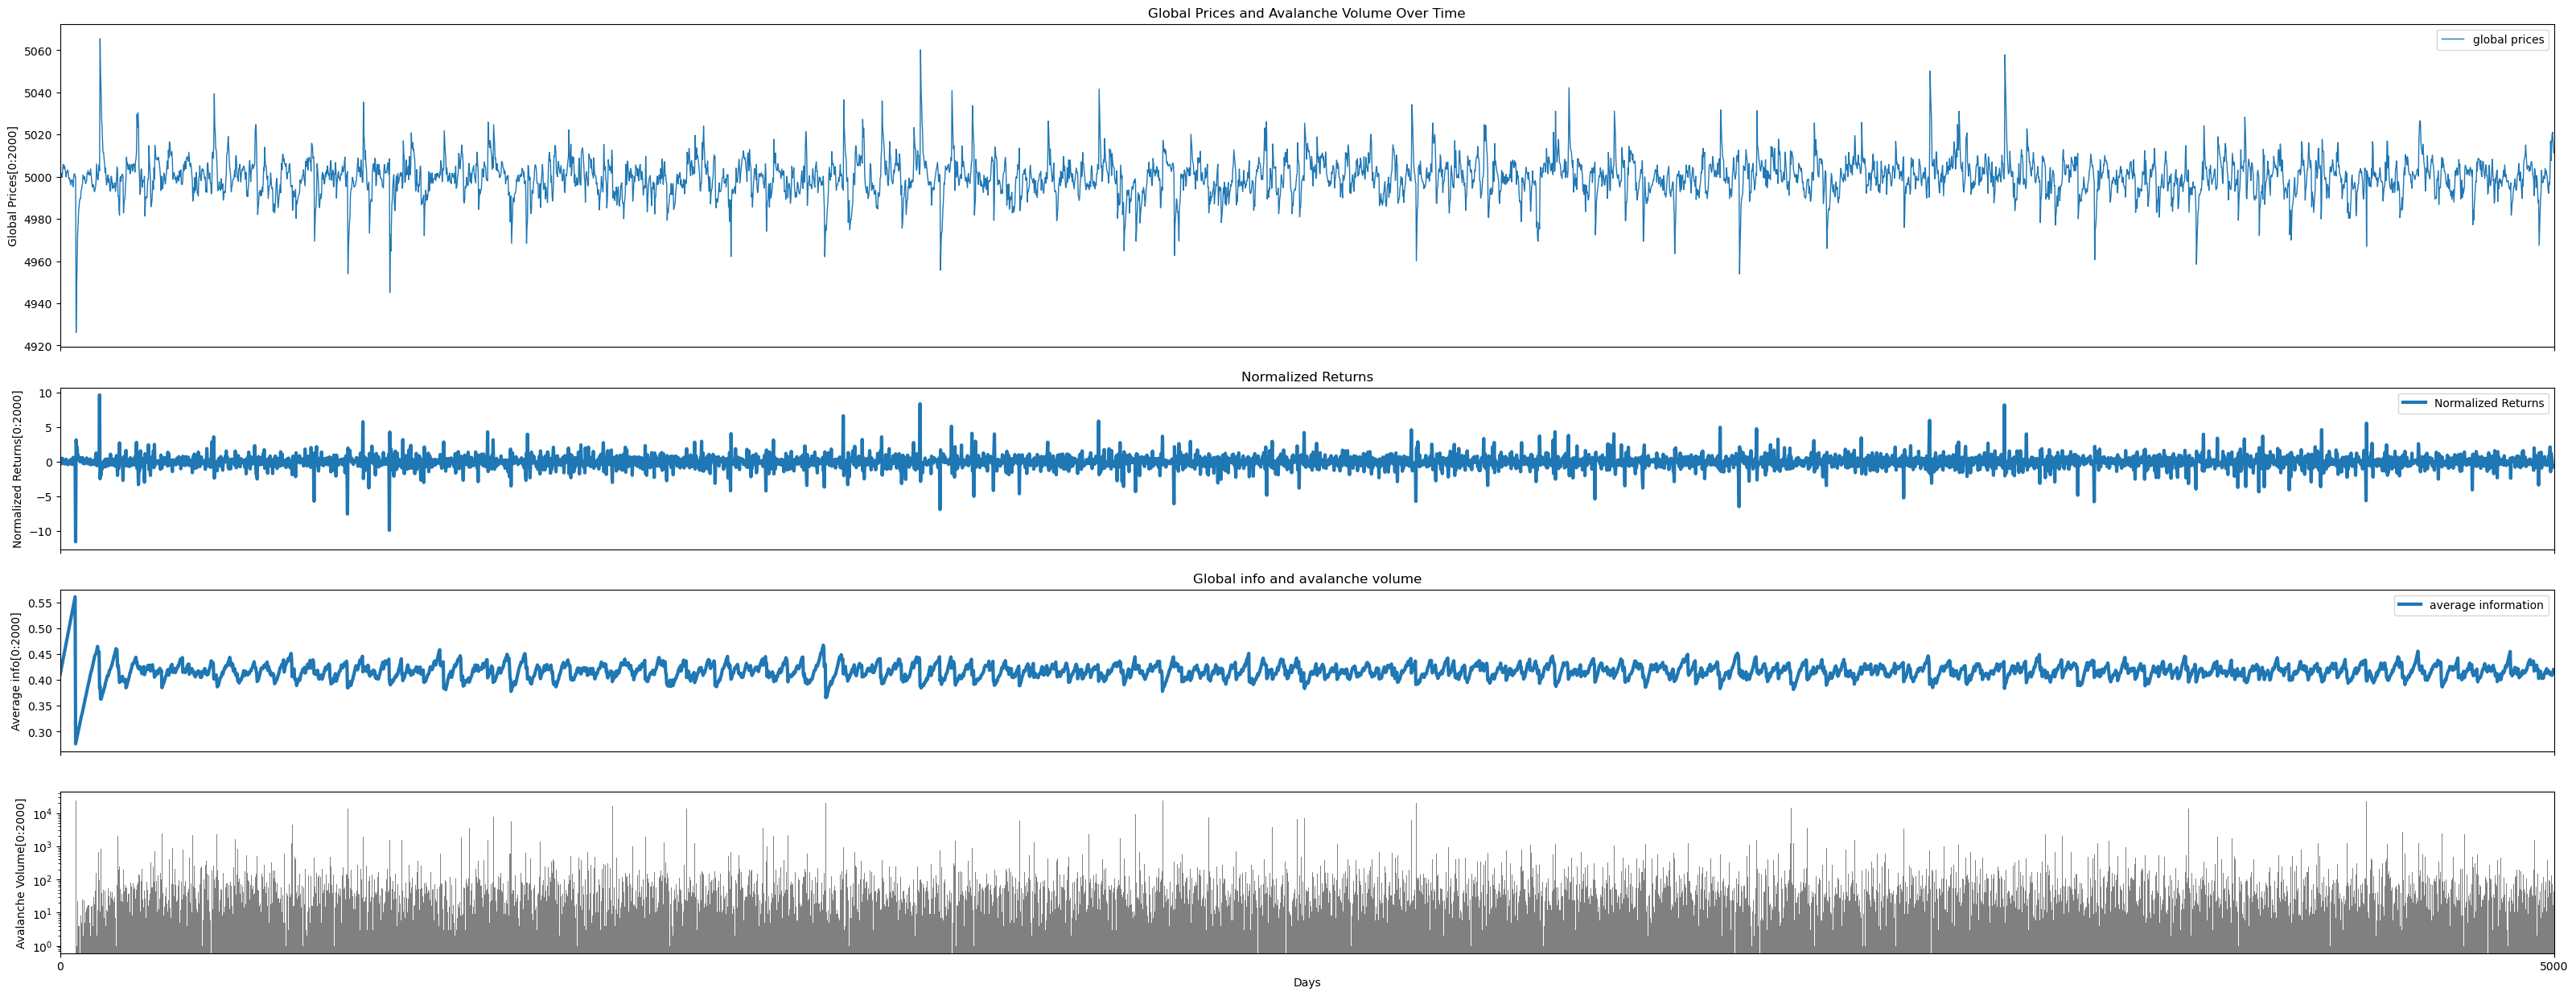

In [ ]:
# Plotting
# plt.figure(figsize=(70, 10))
# plt.xlim(0, len(global_prices))

xmas = 5000
# Create subplots with shared x-axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(40, 15), sharex=True, gridspec_kw={'height_ratios': [2,1,1,1]})
ax1.plot(global_prices[0:xmas], linewidth=1, label='global prices')
ax1.set_xlim([0, xmas]) 
# ax1.axhline(y=5000, color='red', label='Fundamental price')
ax1.set_ylabel('Global Prices[0:2000]')
ax1.set_title('Global Prices and Avalanche Volume Over Time')
ax1.legend()
#Normalized Returns 
returns_price = [np.log(global_prices[i+1])-np.log(global_prices[i]) for i in range(len(global_prices)-1)]
mean_returns = np.mean(returns_price) 
stand_returns = np.std(returns_price)
normalized_returns = [(r - mean_returns) / stand_returns for r in returns_price]
ax2.plot(normalized_returns[0:xmas], linewidth=3, label='Normalized Returns')
ax2.set_ylabel('Normalized Returns[0:2000]')
ax2.set_title('Normalized Returns')
ax2.legend()

# Line plot for global prices on the first subplot
info_list_sliced = info_list[0]
ax3.plot(info_list_sliced[0:xmas], linewidth=3, label='average information')
ax3.set_ylabel('Average info[0:2000]')
ax3.set_title('Global info and avalanche volume')
ax3.legend()
# Histogram (volume) for avalanche volume on the second subplot
avalanches_summed = [np.sum(day) for day in avalanches]
avalanches_summed_sliced = avalanches_summed[0:xmas]
bin_edges = np.arange(0, len(avalanches_summed_sliced) + 1, 1)
ax4.hist(range(len(avalanches_summed_sliced)), bins=bin_edges, weights=avalanches_summed_sliced, color='gray')
ax4.set_ylabel('Avalanche Volume[0:2000]')
ax4.set_xlabel('Days')
ax4.set_yscale('log')  # Set y-axis to logarithmic scale
# _ = ax1.set_xticks(np.arange(0.5, len(global_prices)+0.5, 2))  # Set x-axis ticks every 10 days
_ = ax1.set_xticks(np.arange(0, xmas+1, xmas))

## Power Law

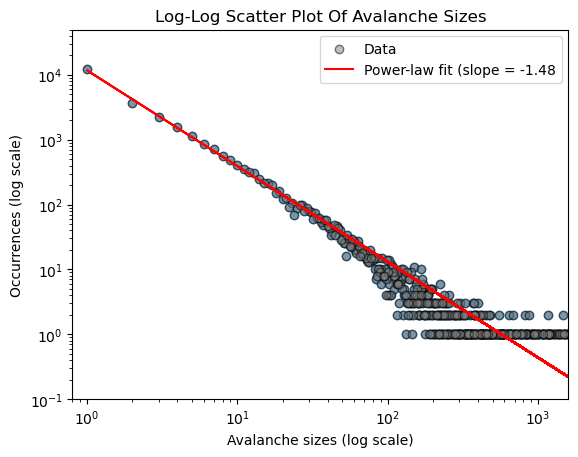

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from itertools import chain

# Assuming 'avalanches' is your list of lists with integer data
flattened_list = list(chain.from_iterable(avalanches))
value_counts = Counter(flattened_list)

# Separate the unique values and their counts
values = np.array(list(value_counts.keys()))
counts = np.array(list(value_counts.values()))

# Filter out zero counts to avoid log(0) issues
non_zero_mask = counts > 0
values_non_zero = values[non_zero_mask]
counts_non_zero = counts[non_zero_mask]

# Log-transform the values and counts
log_values = np.log(values_non_zero)
log_counts = np.log(counts_non_zero)

# Errors for log(counts) and weights for the fitting
errorbars = 1 / np.sqrt(counts_non_zero)
weights = np.sqrt(counts_non_zero)  # weights are proportional to the count

# Define the model function for fitting
def model_func(x, a, b):
    return a * x + b

# Perform linear regression using curve_fit with weights
popt, pcov = curve_fit(model_func, log_values, log_counts, sigma=errorbars, absolute_sigma=True)
fitted_line = model_func(log_values, *popt)

# Create a scatter plot on log-log scale with error bars
plt.scatter(values_non_zero, counts_non_zero,alpha = 0.6,)
plt.scatter(values_non_zero, counts_non_zero, color ='black',alpha = 0.5 ,facecolor = 'grey', label=f'Data')
plt.xlim(0.8,1600)
plt.ylim(0.1,50000)
plt.plot(values_non_zero, np.exp(fitted_line), color='red', label=f'Power-law fit (slope = {popt[0]:.2f}')

# Set the scale to log for both axes
plt.xscale('log')
plt.yscale('log')

# Add labels and legend
plt.title('Log-Log Scatter Plot Of Avalanche Sizes')
plt.xlabel('Avalanche sizes (log scale)')
plt.ylabel('Occurrences (log scale)')
plt.legend()
plt.show()
